# Baixando a base e inicializando os dados 

In [66]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [67]:
#Baixar o dataset
data = fetch_covtype(as_frame=True).frame
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [68]:
wilderness_columns = [col for col in data.columns if col.startswith('Wilderness_Area')]
wilderness_classes = []
for _, row in data.iterrows():
    for col in wilderness_columns:
        if row[col] == 1:
            wilderness_classes.append(col.split('_')[-1])
            break
data.drop(columns=wilderness_columns, inplace=True)
data.insert(len(data.columns)-1, 'Wilderness_Area', wilderness_classes)

In [69]:
soil_type_columns = [col for col in data.columns if col.startswith('Soil_Type')]
soil_type_classes = []
for _, row in data.iterrows():
    for col in soil_type_columns:
        if row[col] == 1:
            soil_type_classes.append(int(col.split('_')[-1]))
            break
data.drop(columns=soil_type_columns, inplace=True)
data.insert(len(data.columns)-1, 'Soil_Type', soil_type_classes)

In [70]:
class_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
class_labels_dict = {i: label for i, label in enumerate(class_labels, start=1)}
data['Cover_Type'] = data['Cover_Type'].map(class_labels_dict)

In [71]:
data = data.sample(10000, random_state=0)

In [72]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
215988,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
424155,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
274437,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
65944,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
11015,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77297,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
103214,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
459385,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
159359,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


In [85]:
data.to_csv('cov_type.csv',index=False)

# Exploração de dados

In [87]:
base = pd.read_csv('cov_type.csv')
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


In [ ]:
base.head(10) #Mostra as dez primeiras linhas

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
5,2656.0,20.0,9.0,323.0,73.0,1082.0,214.0,221.0,143.0,1036.0,0,11,Lodgepole Pine
6,2992.0,105.0,36.0,201.0,141.0,1211.0,252.0,170.0,12.0,1584.0,2,32,Spruce/Fir
7,3110.0,32.0,14.0,379.0,43.0,5028.0,216.0,208.0,125.0,2845.0,0,29,Spruce/Fir
8,3242.0,40.0,15.0,85.0,19.0,3330.0,220.0,207.0,118.0,3164.0,2,23,Lodgepole Pine
9,3025.0,273.0,10.0,391.0,24.0,2797.0,192.0,243.0,190.0,234.0,0,21,Spruce/Fir


In [90]:
base.tail(10) #Mostra as dez ultimas linhas

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
9990,2788.0,20.0,9.0,30.0,2.0,3555.0,214.0,221.0,143.0,2984.0,0,22,Spruce/Fir
9991,2899.0,84.0,17.0,85.0,21.0,1176.0,242.0,208.0,90.0,1664.0,0,29,Lodgepole Pine
9992,3517.0,270.0,5.0,459.0,70.0,1445.0,207.0,241.0,173.0,1937.0,1,39,Krummholz
9993,2942.0,351.0,10.0,391.0,29.0,5337.0,203.0,224.0,159.0,2105.0,0,28,Lodgepole Pine
9994,2055.0,327.0,19.0,30.0,14.0,532.0,169.0,215.0,183.0,684.0,3,13,Douglas-fir
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine
9999,2682.0,91.0,13.0,162.0,32.0,1369.0,240.0,219.0,108.0,1661.0,2,10,Lodgepole Pine


In [144]:
base.describe() #Mostra as estatisicas basicas

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2966.946400,153.860000,14.148400,270.744400,46.610200,2357.047800,212.520300,223.253900,141.993600,1986.776600,1.107900,23.584100
std,278.877757,111.313091,7.467714,211.481433,58.188252,1564.031388,26.642597,19.851419,38.458979,1324.588532,1.058097,9.413001
min,1893.000000,0.000000,0.000000,0.000000,-132.000000,0.000000,60.000000,104.000000,0.000000,0.000000,0.000000,0.000000
25%,2820.000000,58.000000,9.000000,108.000000,7.000000,1092.000000,199.000000,213.000000,119.000000,1034.000000,0.000000,19.000000
50%,3004.000000,125.000000,13.000000,218.000000,30.000000,2012.000000,218.000000,226.000000,143.000000,1711.000000,1.000000,28.000000
75%,3167.000000,255.000000,18.000000,390.000000,69.000000,3347.000000,231.000000,237.000000,168.000000,2556.000000,2.000000,30.000000
max,3845.000000,360.000000,55.000000,1376.000000,573.000000,6926.000000,254.000000,254.000000,250.000000,7150.000000,3.000000,39.000000


# Visualização dos dados

In [148]:
np.unique(base['Cover_Type'], return_counts=True) #Mostra o nome dos tipos de cobertura

(array(['Aspen', 'Cottonwood/Willow', 'Douglas-fir', 'Krummholz',
        'Lodgepole Pine', 'Ponderosa Pine', 'Spruce/Fir'], dtype=object),
 array([ 163,   55,  278,  362, 4847,  581, 3714], dtype=int64))

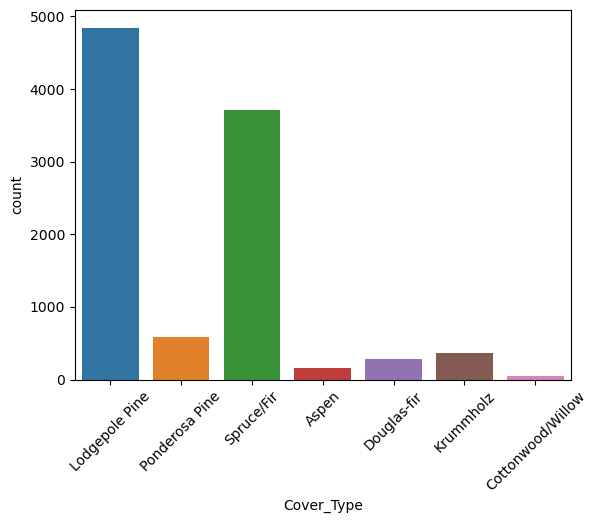

In [154]:
sns.countplot(x=base['Cover_Type'],hue=base['Cover_Type']) #Mostra o nome das coberturas me gráfico

plt.xticks(rotation=45); #Totaciona 45 graus os nomes

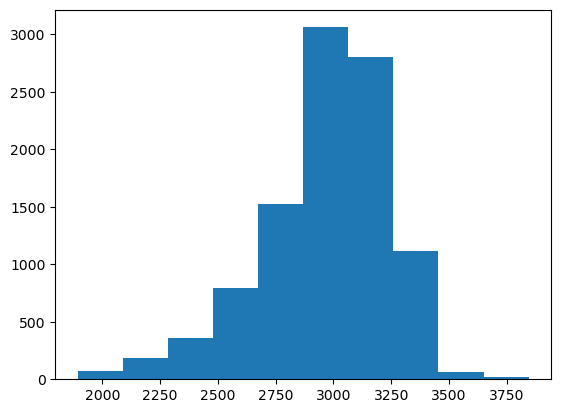

In [145]:
plt.hist(base['Elevation']); #Mostra o histograma da elevação

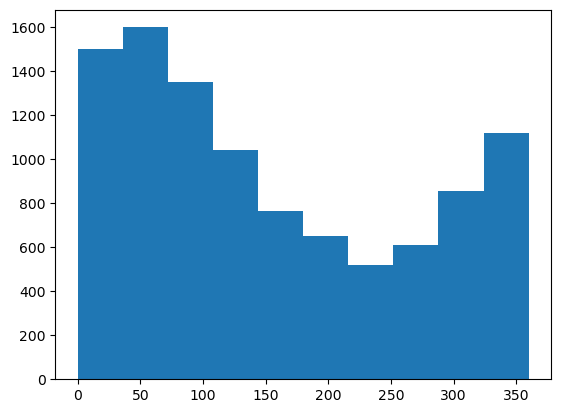

In [146]:
plt.hist(base['Aspect']); #Mostra o histograma da orientação

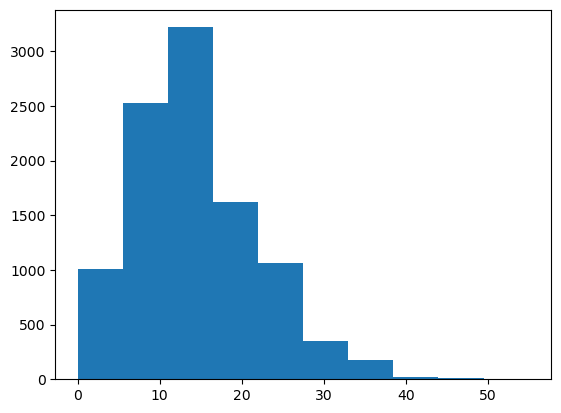

In [147]:
plt.hist(base['Slope']); #Mostra o histograma da inclinação

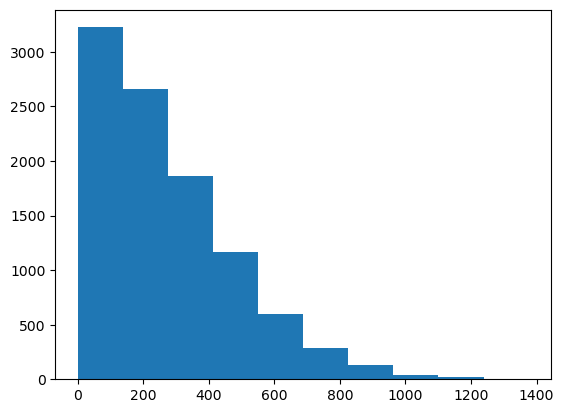

In [155]:
plt.hist(base['Horizontal_Distance_To_Hydrology']); #Mostra o histograma da distância horizontal até a hidrologia  

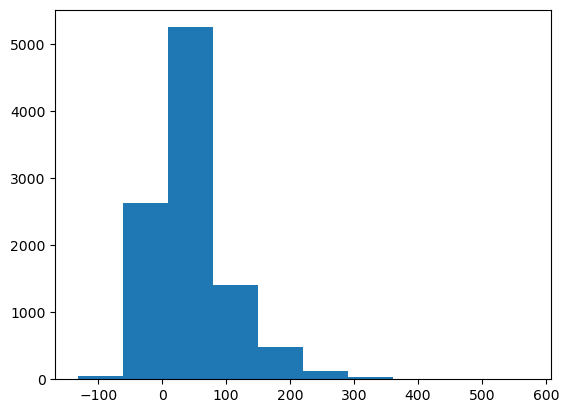

In [156]:
plt.hist(base['Vertical_Distance_To_Hydrology']); #Mostra o histograma da distância vertical até a hidrologia

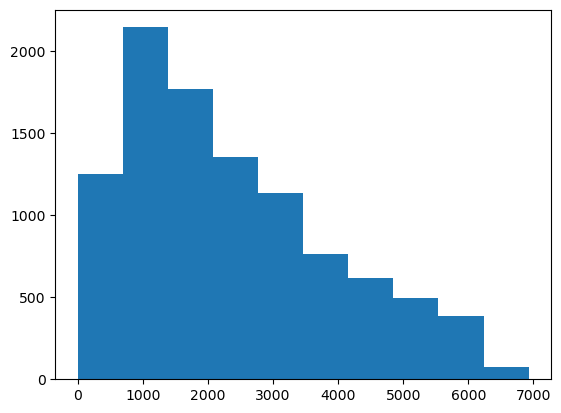

In [157]:
plt.hist(base['Horizontal_Distance_To_Roadways']); #Mostra o histograma da distância horizontal até as estradas

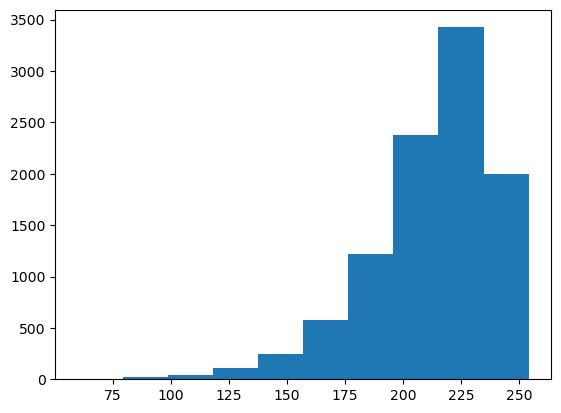

In [158]:
plt.hist(base['Hillshade_9am']); #Mostra o histograma da sombra da colina às 21h

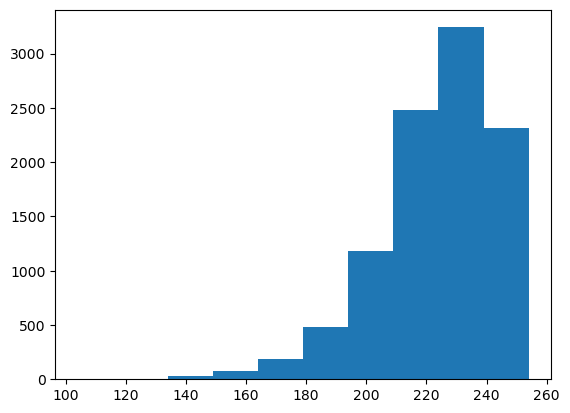

In [159]:
plt.hist(base['Hillshade_Noon']); #Mostra o histograma da sombra da colina ao meio-dia

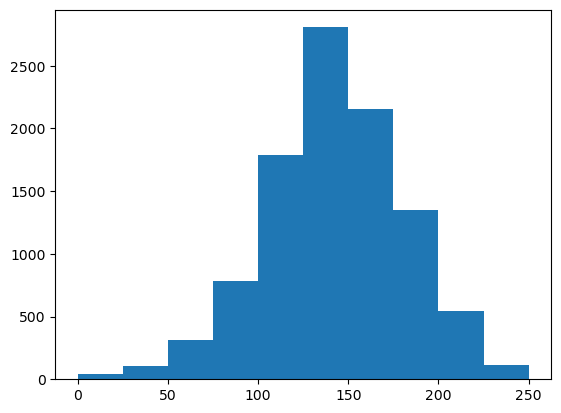

In [160]:
plt.hist(base['Hillshade_3pm']); #Mostra o histograma da sombra da colina às 15h

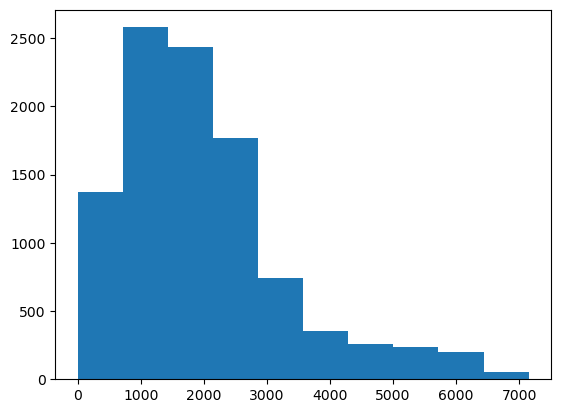

In [161]:
plt.hist(base['Horizontal_Distance_To_Fire_Points']); #Mostra o histograma da distância horizontal até os pontos de incêndio

In [162]:
grid = px.scatter_matrix(base, dimensions=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],color='Cover_Type', title='Scatter Matrix of Covtype Dataset', labels={'Cover_Type': 'Cover Type'}, height=1000, width=1000) #Faz um grid das tabelas das variaveos selecioandas
grid.show()


# Divisão entre previsores e classe

In [163]:
X_covType = base.iloc[:, :-1].values #Divide os dados em X, variaveis independentes
X_covType

array([[2.767e+03, 6.600e+01, 1.700e+01, ..., 2.251e+03, 2.000e+00,
        3.000e+01],
       [2.724e+03, 1.600e+02, 1.900e+01, ..., 2.514e+03, 2.000e+00,
        1.600e+01],
       [2.360e+03, 6.500e+01, 7.000e+00, ..., 3.390e+02, 3.000e+00,
        5.000e+00],
       ...,
       [3.052e+03, 7.900e+01, 1.900e+01, ..., 1.490e+03, 2.000e+00,
        2.200e+01],
       [2.958e+03, 5.800e+01, 6.000e+00, ..., 2.280e+03, 0.000e+00,
        2.800e+01],
       [2.682e+03, 9.100e+01, 1.300e+01, ..., 1.661e+03, 2.000e+00,
        1.000e+01]])

In [164]:
y_covType = base.iloc[:, -1].values #Divide os dados em y, variaveis dependentes
y_covType

array(['Lodgepole Pine', 'Lodgepole Pine', 'Ponderosa Pine', ...,
       'Spruce/Fir', 'Lodgepole Pine', 'Lodgepole Pine'], dtype=object)

# Tratamento da variável alvo com LabelEncoder

In [166]:
label_encode = LabelEncoder() #Codifica a  váriavel alvo

y_covType = label_encode.fit_transform(y_covType) #Faz a trasnformação
y_covType #Mostar resultado

array([4, 4, 5, ..., 6, 4, 4])

# Tratamento das variávies preditoras com StandardScaler e OneHotEncoder

In [165]:
X_encoder =ColumnTransformer(transformers=[('StandardScaler',StandardScaler(),slice(0,10)),('OneHotEncoder',OneHotEncoder(sparse_output=False),[10,11])]) # Aplicando o StandardScaler nas primeiras 10 colunas e OneHotEncoder nas colunas 10 e 11

X_covType = X_encoder.fit_transform(X_covType) #Faz a transformação
X_covType #Mostra o resultado 

array([[-0.71700375, -0.78934465,  0.38187624, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87120088,  0.05516249,  0.6497092 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.17649753, -0.79832877, -0.95728858, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.30500049, -0.67255111,  0.6497092 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.03208161, -0.8612176 , -1.09120506, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02181203, -0.56474169, -0.15378969, ...,  0.        ,
         0.        ,  0.        ]])

# Divisão para as variaveis de teste e de treinamento

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_covType, y_covType, test_size = 0.25, random_state=0) #Separa as variaveis em variaveis de teste e de treianmento

In [141]:
X_train.shape, y_train.shape #Tamanho varaiaveis de treianmento

((7500, 53), (7500,))

In [142]:
X_test.shape, y_test.shape #Tamanho das varaiveis de teste

((2500, 53), (2500,))

In [143]:
with open('cover_type.pkl',mode='wb') as f: #Abre um arquivo para escrita  em modo bianário
    pickle.dump((X_train,y_train,X_test,y_test),f) #Salva as variaveis no arquivo